<a href="https://colab.research.google.com/github/NathanBeal/Predicitve_Horse_Racing_Analysis/blob/main/Horse_Racing_ML_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Init of Fast.ai Libraries & Data**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.tabular import *

# Num Py
import numpy as np
from scipy.linalg import eig

# Inits Path
folder = 'HORSE'
path = Path('data')
dest = path/folder
dest.mkdir(parents = True, exist_ok=True)

dep_var = 'trifecta'
cat_names = ['hName', 'jName']
cont_names = ['odds','fav', 'pastPos','last10']
 
procs = [FillMissing, Categorify, Normalize]

In [ ]:
df = pd.read_csv("/content/Testing.csv")
test = TabularList.from_df(df.copy(), path=path, cat_names=cat_names, cont_names=cont_names); 
# test.show_xyzs

## **STAGE 1: PREDICTIVE MODEL    ~79.5% ACCURATE**

In [ ]:
#Data
df = pd.read_csv("/content/Data.csv")
test2 = TabularList.from_df(df.copy(), path=path, cat_names=cat_names, cont_names=cont_names); 
test2.show_xyzs

# Buffer to allow last 3, 5 and 10 to populate
buffer = 200;
totalRows = df.shape[0];
availRows = totalRows - buffer;
trainSize = (int)(availRows*0.8);
train1 = buffer;
train2 = trainSize;
valid1 = trainSize+1;
valid2 = totalRows;


In [ ]:
# CSV File
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_idxs(train_idx= range(train1, train2), valid_idx= range(valid1, valid2))
                .label_from_df(cols=dep_var)
                .add_test(test)
                .databunch())

In [ ]:

# data.sanity_check
# data.show_batch(rows=2)
print(data.valid_ds); print(data.test_ds); print(data.train_ds)

LabelList (4614 items)
x: TabularList
hName Big Q; jName Lezcano/Jose; odds -0.7003; fav 2.4840; pastPos 1.0059; last10 0.4924; ,hName #na#; jName Alvarado/Junior; odds 0.0284; fav -0.4026; pastPos -2.0436; last10 0.9881; ,hName A Freud of Mama; jName Vargas/Jr./Jorge; odds 0.3421; fav -0.4026; pastPos -1.0271; last10 -0.4989; ,hName #na#; jName Diaz/Jr./Hector; odds 3.8546; fav -0.4026; pastPos -1.0271; last10 0.4924; ,hName Central Exit; jName Martinez/Joey; odds 3.4279; fav -0.4026; pastPos -1.0271; last10 -1.4903; 
y: CategoryList
0,0,1,0,0
Path: data
LabelList (13 items)
x: TabularList
hName Gringotts; jName Rodriguez/Castro/Luis; odds 2.1940; fav -0.4026; pastPos -1.0271; last10 -1.9860; ,hName #na#; jName Cardenas/Luis; odds -0.4098; fav -0.4026; pastPos -0.0106; last10 -0.4989; ,hName La Negrita; jName Rosario/Joel; odds -0.5435; fav -0.4026; pastPos 1.0059; last10 -0.4989; ,hName Dazzling Speed; jName Harkie/Heman; odds 3.3818; fav -0.4026; pastPos -1.0271; last10 -0.9946; ,hN

In [ ]:
learn.purge()
del learn
gc.collect()

13

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


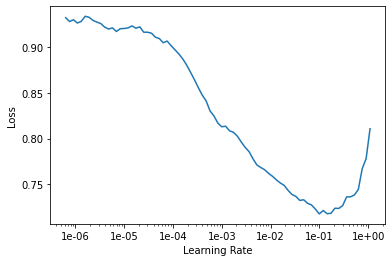

In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit(1,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.575615,0.565203,0.706112,00:02


In [ ]:
# learn.save('Model 1')
# learn.export()

In [ ]:
# Checks Validation Outputs
      # 2nd output is relative Validation Accuracy
learn.validate()
# learn.show_results(rows = 15)

[0.5652034, tensor(0.7061)]

In [ ]:
preds, y = learn.get_preds(DatasetType.Test);
labels = np.argmax(preds, 1)
print(learn.data.classes);
print(preds); print(labels); # print(len(labels))

[0, 1]
tensor([[0.9483, 0.0517],
        [0.5781, 0.4219],
        [0.3842, 0.6158],
        [0.9701, 0.0299],
        [0.9346, 0.0654],
        [0.9914, 0.0086],
        [0.6736, 0.3264],
        [0.9420, 0.0580],
        [0.4335, 0.5665],
        [0.3225, 0.6775],
        [0.9199, 0.0801],
        [0.5620, 0.4380],
        [0.7206, 0.2794]])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])


In [ ]:
df = pd.read_csv("/content/Testing.csv")
predsUO = [0 for i in range(len(preds))];
for i in range(len(preds)):
  # print(df.hName[i], '' , round(float(preds[i][1]), 3))
  predsUO[i] = round(float(preds[i][1]), 3);

maxArrIndex = 0
maxArr=[]
maxArr = [0 for i in range(len(preds))] 
for i in range(len(preds)):
  maxArr[i] = round(float(preds[i][1]),3)
maxArr = sorted(maxArr)

sortedArr = [0 for i in range(len(preds))] 
for i in range(len(maxArr)):
  sortedArr[ (len(preds)-1) -i] = maxArr[i];

# print(predsUO)
# print(sortedArr)
max = 0;
nameArr = [0 for i in range(len(preds))]; nArrIndex = 0;
n = len(preds);
while(n != 0):
  for i in range(len(maxArr)):
    if(max < predsUO[i]):
      max = predsUO[i];
      index = i;
  nameArr[nArrIndex] = df.hName[index]
  n-=1; nArrIndex+=1;
  predsUO[index] = 0;
  index = 0;
  max = 0;

print('Projected Results')
for i in range(len(maxArr)):
  print((i+1),'. ', sortedArr[i], '  ', nameArr[i])

Projected Results
1 .  0.677    Dare to Try
2 .  0.616    La Negrita
3 .  0.567    Nicky Scissors
4 .  0.438    Left Leaning Lucy
5 .  0.422    Mia Bea Star
6 .  0.326    Cruising Strong
7 .  0.279    Shannon's Girl
8 .  0.08    Lasagna
9 .  0.065    Touch of Nirvana
10 .  0.058    Tripp Road
11 .  0.052    Gringotts
12 .  0.03    Dazzling Speed
13 .  0.009    Sarahrini


In [ ]:
# Odds to probabilitites
print('Projected Odds')
for i in range(len(preds)):
  probabilityTrifecta = 1/(preds[i][1]) -1
  t = 1/probabilityTrifecta
  print('1:',round(float(probabilityTrifecta),2), '  ',df.hName[i])
  #print(round(float(t), 2),':1')

Projected Odds
1: 18.33    Gringotts
1: 1.37    Mia Bea Star
1: 0.62    La Negrita
1: 32.4    Dazzling Speed
1: 14.28    Touch of Nirvana
1: 115.6    Sarahrini
1: 2.06    Cruising Strong
1: 16.23    Tripp Road
1: 0.77    Nicky Scissors
1: 0.48    Dare to Try
1: 11.48    Lasagna
1: 1.28    Left Leaning Lucy
1: 2.58    Shannon's Girl


##*Prediction Evaluation*

In [ ]:
countFringe = 0; countDeterminate = 0;
for i in range(len(preds)):
  if(preds[i][0] < .65 and preds[i][0] > .35 ):
    countFringe+=1;
  if(preds[i][0] < .15 or preds[i][0] > .85 ):
    countDeterminate+=1;
pFringe = round(countFringe/len(preds) * 100,2); pDeter = round(countDeterminate/len(preds) * 100,2); 
print("Number of fringe decisions: " + str(countFringe))
print("Number of confidant decisions: " + str(countDeterminate))
des = len(preds) - countFringe - countDeterminate;

print("Number of desirable decisions: " + str(des))
print("Percentage of fringe decisions: " + str(pFringe) + "%")
print("Percentage of confidant decisions: " + str(pDeter) + "%")
pDes = round(des/len(preds) * 100,2); 
print("Percentage of des decisions: " + str(pDes) + "%")

Number of fringe decisions: 6
Number of confidant decisions: 0
Number of desirable decisions: 3
Percentage of fringe decisions: 66.67%
Percentage of confidant decisions: 0.0%
Percentage of des decisions: 33.33%


##**STAGE 2: GOOGLE PAGE RANK ANALYSIS    (95% - Need W/L for Last Case and Jockey Win%)**

In [ ]:
value = 0; numOfHorses = 0; length = len(labels)
while(value < length):
  value = value + numOfHorses
  numOfHorses = numOfHorses + 1

#2D Array Fill
df = pd.read_csv(path/strTest)
testdata = df.copy();

jockey1 = ''; jockey2 ='';
jockey1 = testdata.jName1[0]
jockey2 = testdata.jName1[1]
raceJockeys = [];   raceHorses = [];
flipped = False;
#First Check which Horse is the winner
if(jockey1 == jockey2): #Same horse therfore is winner
  raceHorses.append(testdata.hName1[0]);
  raceJockeys.append(jockey1);
  flipped = True;
else:                   #Diff horses therefore column of losers
  raceHorses.append(testdata.hName2[0])
  raceJockeys.append(testdata.jName2[0])
  flipped = False;

#List of Jockeys & Horese
for i in range (numOfHorses-1):
  if(flipped == True):
    raceHorses.append(testdata.hName2[i]);
    raceJockeys.append(testdata.jName2[i]);
  else:
    raceHorses.append(testdata.hName1[i]);
    raceJockeys.append(testdata.jName1[i]);

print(raceHorses);
print(raceJockeys);

['Wicked Kheisha', 'Tokyo Bay', 'My Sweet Kat', 'Wicked Kheisha', 'Bird Flying', 'My Sweet Kat']
['Maragh/Romero', 'Davis/Dylan', 'Lezcano/Jose', 'Maragh/Romero', 'Fukumoto/Daisuke', 'Lezcano/Jose']


In [ ]:
# READING JOCKEY STATISTICS DATA
path = Path('data')
df = pd.read_csv(path/'Jockey Statistics.csv')
jockeyData = df.copy();

# All Data From Jockey Statistics.csv
jockeyNames = jockeyData.JockeyName; numberOfRaces = jockeyData.NumOfRaces;
wins = jockeyData.Win; place = jockeyData.Place; show = jockeyData.Show
winPercentage = jockeyData.WinPercent; top3Percent = jockeyData.Top3Percent                     #x10000
QP = jockeyData.QP; AQP = jockeyData.AQP; NNQP = jockeyData.NNQP; ANNQP = jockeyData.ANNQP      
last3 = jockeyData.Last3; last5 = jockeyData.Last5; last10 = jockeyData.Last10                  # x1000

# Find Indeces of Current Horses
indeces = [];
for i in range(len(raceJockeys)):
  for j in range(len(jockeyNames)):
    if(raceJockeys[i] == jockeyNames[j]):
      indeces.append(j)
print(indeces)

BETAQP = []; BETAAQP = []; BETANNQP = []; BETAANNQP = []
for i in range(len(indeces)):
  BETAQP.append( round(QP[indeces[i]]/1000, 4))
  BETAAQP.append( round(AQP[indeces[i]]/1000 , 4))
  BETANNQP.append( (round((NNQP[indeces[i]]/1000), 4) ) )
  BETAANNQP.append((round((ANNQP[indeces[i]]/1000), 4) ) )

minNNQP = 100;
minANNQP = 100;
for i in range(len(BETANNQP)):
  if(minNNQP > BETANNQP[i]):
    minNNQP = BETANNQP[i];
  if(minANNQP > BETAANNQP[i]):
    minANNQP = BETAANNQP[i];
# print(minNNQP)
# print(minANNQP)

# print(BETANNQP)
# print(BETAANNQP)

for i in range(len(BETANNQP)):
  BETANNQP[i] = round(BETANNQP[i] + abs(minNNQP) + 0.01, 3);
  BETAANNQP[i] = round(BETAANNQP[i] + abs(minANNQP) + 0.01, 3);

print(BETAQP)
print(BETAAQP)
print(BETANNQP)
print(BETAANNQP)

if(len(BETAQP) != numOfHorses or len(BETAAQP) != numOfHorses or len(BETANNQP) != numOfHorses or len(BETAANNQP) != numOfHorses):
  print('CRITICAL ERROR: HORSE NOT RECOGNIZED')

[115, 1, 3, 115, 106, 3]
[8.9247, 401.5932, 375.3023, 8.9247, 12.6367, 375.3023]
[0.4958, 0.6003, 0.6516, 0.4958, 0.5055, 0.6516]
[0.01, 25.44, 57.75, 0.01, 0.2, 57.75]
[0.01, 0.144, 0.206, 0.01, 0.045, 0.206]


In [ ]:
#2D Array Init
print('Initialized Array')
rows, cols = (numOfHorses, numOfHorses) 
arr = [[0] * numOfHorses for i in range(numOfHorses)]
for x in range(numOfHorses):
  print(arr[x])


horsesProcessed = 0;
numberOfMatchups = (numOfHorses-1) - horsesProcessed;
currentHorse = raceHorses[horsesProcessed]
diagonalOffset = 1;
print('')
labelsIndex = 0;
jockey1 = ''; jockey2 = '';
jIterator = 0;
repeatedHorseColumn1 = False;
for horseNum in range(numOfHorses-1): #i represents which horse we are on
  if((jIterator) < len(labels)-1):
    jockey1 = testdata.jName1[jIterator];
    jockey2 = testdata.jName1[jIterator+1];
    if(jockey1 == jockey2):
      repeatedHorseColumn1 = True;
    else:
      repeatedHorseColumn1 = False;

    while(horsesProcessed != numberOfMatchups):
      #Needs conditionals
      if(repeatedHorseColumn1 == True):
        if(labels[labelsIndex] == 0): # Horse in column 1 wins
          arr[horsesProcessed + diagonalOffset][horseNum] = 1;
          arr[horseNum][horsesProcessed + diagonalOffset] = 0;
        else: # The horse being matched loses to the horse in the second column
          arr[horsesProcessed + diagonalOffset][horseNum] = 0
          arr[horseNum][horsesProcessed + diagonalOffset] = 1;
      else:
        if(labels[labelsIndex] == 0): # Horse in column 1 wins
          arr[horsesProcessed + diagonalOffset][horseNum] = 0;
          arr[horseNum][horsesProcessed + diagonalOffset] = 1;
        else: # The horse being matched loses to the horse in the second column
          arr[horsesProcessed + diagonalOffset][horseNum] = 1;
          arr[horseNum][horsesProcessed + diagonalOffset] = 0;

        #print('Not eval')
          
      #arr[horsesProcessed + diagonalOffset][horseNum] = labels[labelsIndex];
      labelsIndex += 1;
      horsesProcessed += 1;
      jIterator += 1;

    numberOfMatchups = numberOfMatchups - 1;
    horsesProcessed = 0;
    diagonalOffset += 1
  else:
    #Find Which Two jockeys are pitted against each other
    lastDataPoint = labels[len(labels)-1]
    jockeyJ11 = testdata.jName1[(len(labels)-1) - 2]
    jockeyJ12 = testdata.jName1[(len(labels)-1) - 1]
    jockeyJ21 = testdata.jName2[(len(labels)-1) - 2]
    jockeyJ22 = testdata.jName2[(len(labels)-1) - 1]
    if(jockeyJ11 == jockeyJ12 and (jockeyJ21 != jockeyJ22)):
      jSecondToLast = jockeyJ21;
      jLast = jockeyJ22;
    else:
      jSecondToLast = jockeyJ11;
      jLast = jockeyJ12;

    # Find which column the Second-To-Last (to be evaluated) jockey
    if(jSecondToLast == testdata.jName1[(len(labels)-1)]): # Second to last is in first column
      if(labels[len(labels)-1] == 0):
        arr[numOfHorses-1][numOfHorses-2] = 1;
      else:
        arr[numOfHorses-2][numOfHorses-1] = 1;
    else:                                                  # Second to last is in second column
      if(labels[len(labels)-1] == 0):
        arr[numOfHorses-2][numOfHorses-1] = 1;
      else:
        arr[numOfHorses-1][numOfHorses-2] = 1;                                                  # Second to last is in second column
      
    # print('Second to Last Jockey', jW)
    # print(lastDataPoint)
    # print('Caught')
  
for x in range(numOfHorses):
  print(arr[x])

print('')
print('Sum Array')
sumArr = []
SUM = 0
for x in range(numOfHorses):
  for y in range(numOfHorses):
    SUM = SUM + int(arr[x][y])
  sumArr.append(SUM)
  SUM = 0
print(sumArr)

# BETA Evaluation 
# vT = 1/numOfHorses;   e = 1;      # vT could be jockey win %, room for flexibility
# BETA = e*vT*(1-ALPHA)


#Special Beta Evaluation
sum0 = 0; sum1 = 0; sum2 = 0; sum3 = 0;
for i in range(len(BETAQP)):
  sum0 = sum0 + BETAQP[i];
  sum1 = sum1 + BETAAQP[i];
  sum2 = sum2 + BETANNQP[i];
  sum3 = sum3 + BETAANNQP[i];
for i in range(len(BETAQP)): #Normalizes with respect to 1 
  BETAQP[i] = BETAQP[i]/sum0;
  BETAAQP[i] = BETAAQP[i]/sum1;
  BETANNQP[i] = BETANNQP[i]/sum2;
  BETAANNQP[i] = BETAANNQP[i]/sum3;
print(BETAQP)
print(BETAAQP)
print(BETANNQP)
print(BETAANNQP)
print('')
# Normal vT
# for x in range(numOfHorses):
#   for y in range(numOfHorses):
#     if(sumArr[x] != 0):
#       arr[x][y] = (((int(arr[x][y])/sumArr[x])*ALPHA) + BETA)
    
#     if(sumArr[x] == 0):
#       arr[x][y] = (((1/numOfHorses)*BETA))

Initialized Array
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]

[0, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 1]
[1, 1, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0]
[0, 1, 0, 0, 1, 0]

Sum Array
[3, 1, 3, 3, 3, 2]
[0.007546141449968161, 0.3395608919678369, 0.3173310298719717, 0.007546141449968161, 0.010684765388283378, 0.3173310298719717]
[0.1457978003881668, 0.17652767158736693, 0.19161324472151972, 0.1457978003881668, 0.14865023819326, 0.19161324472151972]
[7.084159818645508e-05, 0.18022102578634172, 0.40911022952677806, 7.084159818645508e-05, 0.0014168319637291016, 0.40911022952677806]
[0.016103059581320453, 0.23188405797101447, 0.33172302737520126, 0.016103059581320453, 0.07246376811594203, 0.33172302737520126]



In [ ]:
theALPHA = 0.95
# BASIC 'S' MATRIX
for x in range(numOfHorses):
  for y in range(numOfHorses):
    if(sumArr[x] != 0):
      arr[x][y] = ((arr[x][y]/sumArr[x]))

print('S MATRIX')
for x in range(numOfHorses):
  print(arr[x])
print('')

print('G MATRIX')
#ALPHA & BETA ADDITION
for x in range(numOfHorses):
  for y in range(numOfHorses):
    if(sumArr[x] != 0):
      arr[x][y] = (theALPHA * (arr[x][y])) + ((1-theALPHA) * BETAQP[y])
    
    if(sumArr[x] == 0):
      arr[x][y] = (theALPHA * (arr[x][y])) + ((1-theALPHA) * BETAQP[y])

for i in range(len(arr)):
  print(arr[i])

S MATRIX
[0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333]
[0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0]
[0.0, 0.5, 0.0, 0.0, 0.5, 0.0]

G MATRIX
[0.0003773070724984084, 0.3336447112650585, 0.33253321816026526, 0.0003773070724984084, 0.0005342382694141694, 0.33253321816026526]
[0.0003773070724984084, 0.01697804459839186, 0.9658665514935986, 0.0003773070724984084, 0.0005342382694141694, 0.0158665514935986]
[0.0003773070724984084, 0.01697804459839186, 0.0158665514935986, 0.31704397373916504, 0.31720090493608083, 0.33253321816026526]
[0.31704397373916504, 0.3336447112650585, 0.0158665514935986, 0.0003773070724984084, 0.0005342382694141694, 0.33253321816026526]
[0.31704397373916504, 0.3336447112650585, 0.0158665514935986, 0.31704397373916504, 0.0005342382

In [ ]:
# WHERE ALL THE DATA WOULD BE GENERATED
ALPHAS = [0.85]
# for i in range(2,19):
#   ALPHAS.append((0.05) * i);
# print(ALPHAS)
# 

percentages5 = []
percentages3 = []

# Eigen Processes
np.set_printoptions(threshold=600)
#Step 1: Load Values
A = np.zeros((numOfHorses,numOfHorses))
for x in range(numOfHorses):
  for y in range(numOfHorses):
    A[x][y] = arr[x][y]

  # print(A)

  # print('')

# Step 2: Matrix Power Method
B = np.linalg.matrix_power(A, 20);
# print(B)
del A;

# Step 3: Eigen Vectoring
C = scipy.linalg.eig(B,left=True,right=False)[1][:,0]
del B;
# print(C)

# Step 4: ABS of Eigen Values
D = []
SUM2 = 0
for x in range(len(C)):
  D.append(abs(C[x]))
  SUM2 = abs(C[x]) + SUM2
del C;

# print(D)
# print(SUM2)

# Step 5: Normalizing
E = []
for x in range(len(D)): 
  E.append(D[x]/SUM2)
# print('Right Here')
# print(E)
del D;

sumss= 0;
for i in range(len(E)):
  sumss = sumss + E[i]
# print(sumss)


# print(E)

# Step 6: Ordering
multArr = []
print('ALPHA: ' + str(round(theALPHA, 2)))
for N in range(len(E)):
  multArr.append([(N+1),(E[N])])
for N in range(len(multArr)):
  print(multArr[N])
  # print('HERE')
maxVal = 0;


maxVal = 0;
index = -1
END = False
SUM3 = 0



#percentages3 = []; percentages5 = [];
totalError = 0;   count = 1; top5Error = 0; top3Error = 0;
i = numOfHorses
while (i != 0):
  for x in range(len(E)):
    SUM3 = SUM3 + E[x]
    if(E[x] < maxVal):
      maxVal = maxVal
    else:
      #print('Max Val', E[x])
      maxVal = E[x]
      index = x
  
  z = index +1;
  print('Horse ' + str(index+1) + ": " + raceHorses[index]); 
  totalError = totalError + abs(z - count)
  if((index+1) < 6):
    top5Error = top5Error + (abs((index+1) - count))
  if((index+1) < 4):
    top3Error = top3Error + (abs((index+1) - count))
  top5Error = abs(top5Error)


  count += 1
  E[index] = 0
  index = 0
  maxVal = 0
  if SUM3 == 0:
    END = True
  SUM3 = 0
  i = i -1

# print(totalError)
maxError = 0;
# print(numOfHorses)
for i in range(1,numOfHorses):
  maxError = maxError + i;

counter = 0;
top5Eval = False; top3Eval = True
if (numOfHorses >= 10):
  top5Eval = True
  top5maxError = 0
  for i in range(1,6):
    top5maxError = top5maxError + (numOfHorses - i - counter)
    counter = counter + 1;

# elif (numOfHorses > 5 and numOfHorses < 10):
#   for i in range(1,5):
#     top5maxError = top5maxError + (numOfHorses - i - counter)
#     counter = counter + 1;
# print(top5maxError)

# Top 3 Horses
counter = 0;
top3maxError = 0;
if (numOfHorses >= 6):
  top3Eval = True
  for i in range(1,4):
    top3maxError = top3maxError + (numOfHorses - i - counter)
    counter = counter + 1;
# print(top3maxError)

# print('Top 5 Error' + str(top5Error))
AccuracyMetric = ((maxError - totalError)/maxError) * 100;

if(top5Eval == True):
  AccuracyMetricTop5 = ((top5maxError - top5Error)/top5maxError) * 100;
  percentages5.append(AccuracyMetricTop5)
  print(str(round(AccuracyMetricTop5, 2)) + '%')

if(top3Eval == True):
  AccuracyMetricTop3 = ((top3maxError - top3Error)/top3maxError) * 100;
  percentages3.append(AccuracyMetricTop3)
  print(str(round(AccuracyMetricTop3,2)) + '%')
print("")

del E;

trifectaOne = False
trifectaTwo = False
trifectaThree = False

# if()

# if()

ALPHA: 0.95
[1, 0.09058945748359608]
[2, 0.21355787796772152]
[3, 0.247433197099406]
[4, 0.1283113695430947]
[5, 0.1565691054393192]
[6, 0.16353899246686254]
Horse 3: My Sweet Kat
Horse 2: Tokyo Bay
Horse 6: My Sweet Kat
Horse 5: Bird Flying
Horse 4: Wicked Kheisha
Horse 1: Wicked Kheisha
22.22%



In [ ]:
#
if(numOfHorses >= 10):
  if len(ALPHAS[i].split("")) == 3:
    print("ddd")
  print("ALPHAS    Top 5       Top 3")
  for i in range(len(percentages5)):
    print(str(round(ALPHAS[i],2)) + "      " + str(round(percentages5[i],2)) + "%       " + str(round(percentages3[i],2)) + "%")
else:
  if (numOfHorses >= 6):
    print("ALPHAS    Top 3")
    for i in range(len(percentages3)):
      if len(str(ALPHAS[i]).split(".")[1]) < 2:
        aStr = str(ALPHAS[i]) + "0";
        print(aStr + "      " + str(round(percentages3[i],2)) + "%")
      else:
        print(str(round(ALPHAS[i],2)) + "      " + str(round(percentages3[i],2)) + "%")

##**STAGE 3: BETTING APPLICATIONS**

In [ ]:
sizeOfBet = 2
horse1Odds = 5
horse2Odds = 5
horse3Odds = 10

#Win
returns = 

#Place

#Show



#Exacta
returnWin = 2*(horse1Odds)*(horse2Odds+1)
print(returnWin)